# Cosmic Watch Data Analysis

# Introduction
This code is at the begining stages, the goal is to create an analysis tool for cosmic watch data that is code based and readable to give students a place to start and the ability to read and change the code so the code is not another black box for the cosmic watch.

In the code below anything that shows up after a pound/hash sign (__#__) is a comment to help with understanding of the code.

In [1]:
# imports some software packages we'll use
import pandas as pd #Pandas lets us name the columns of our data more likea spread sheet.
import numpy as np #Numpy is used by pandas for calculatiions
%matplotlib inline
import matplotlib as mpl #For ploting data
import matplotlib.pyplot as plt #For typing less when poloting data
import math #for other math we might do.

#The next line sets parameters for plots.
inline_rc = dict(mpl.rcParams) 

# The next line imports the data from a csv file to a Pandas data frame.
data = pd.read_csv('https://raw.githubusercontent.com/dkallenberg/Quarknet-CosmicWatch-ipynb/main/CW_Sample.csv')

# Finally the data frome is displayed.
data

,Event,RunTime,ADC,SiPM,DownTime,Temp
0,1,406,185,31.51,727,24.44
1,2,617,371,73.82,731,24.44
2,3,684,575,187.30,735,24.44
3,4,912,339,62.98,739,24.44
4,5,1252,560,175.34,926,24.44
...,...,...,...,...,...,...
6748,6749,2984294,71,19.06,585717,24.44
6749,6750,2985247,71,19.06,585905,24.44
6750,6751,2985606,231,39.55,585910,24.66
6751,6752,2985725,231,39.55,585915,24.44


Next we are going to plot a hystogram of the millivoltss registered by the silicon photomultiplier (SiPM) for every event, in part to see that the data was importated correctly, and also to see how it compares to other data sets.

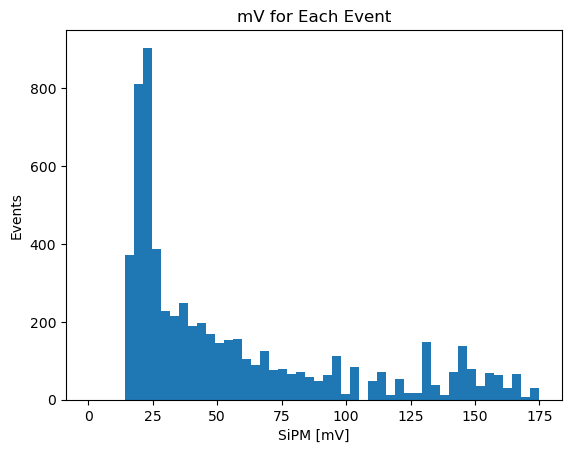

In [2]:
# This makes a histogram of infromation form the data frame above.  
#"data.SiPM" insterts all of the values form the SiPM column of the data frame named data.
plt.hist(data.SiPM, bins=50, range=[0,175], log=False)
plt.title("mV for Each Event")
plt.xlabel("SiPM [mV]")
plt.ylabel("Events");

It takes time for the CosmicWatch's processor to evaluate and report on events, this time is considered down time. The system reports out the down time, we need to use this to calculate the up time, the time when the Cosmic Watch was waiting for a hit. Using the up time we can calculate a rate for every event.

In [12]:
# First we will calculate the 'UpTime' by subtracting gthe down time from the run time
data['UpTime'] = (data.RunTime - data.DownTime)

# Then the up time will be converted to an easily read able time.
data['Time'] = pd.to_timedelta(data.UpTime, unit='ms')

# The UpTime is then converted to a number of minutes by dividing by the 60,000 ms in a minute.
data['Minute']= (data.UpTime/(60000))

#The number of minutes is then rounded to a whole number.
data.Minute = (data.Minute).astype(int)

#
data['avgRate'] = data.Event/(data.UpTime/1000)

#
data

,Event,RunTime,ADC,SiPM,DownTime,Temp,UpTime,Time,Minute,avgRate
0,1,406,185,31.51,727,24.44,-321,-1 days +23:59:59.679000,0,-3.115265
1,2,617,371,73.82,731,24.44,-114,-1 days +23:59:59.886000,0,-17.543860
2,3,684,575,187.30,735,24.44,-51,-1 days +23:59:59.949000,0,-58.823529
3,4,912,339,62.98,739,24.44,173,0 days 00:00:00.173000,0,23.121387
4,5,1252,560,175.34,926,24.44,326,0 days 00:00:00.326000,0,15.337423
...,...,...,...,...,...,...,...,...,...,...
6748,6749,2984294,71,19.06,585717,24.44,2398577,0 days 00:39:58.577000,39,2.813752
6749,6750,2985247,71,19.06,585905,24.44,2399342,0 days 00:39:59.342000,39,2.813271
6750,6751,2985606,231,39.55,585910,24.66,2399696,0 days 00:39:59.696000,39,2.813273
6751,6752,2985725,231,39.55,585915,24.44,2399810,0 days 00:39:59.810000,39,2.813556


In [13]:
Data1Min = data.drop_duplicates(subset=['Minute'], keep='first')
Data1Min = Data1Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]
Data1Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate
0,1,406,727,-321,-1 days +23:59:59.679000,0,-3.115265
184,185,76879,15540,61339,0 days 00:01:01.339000,1,3.016026
366,367,149932,29855,120077,0 days 00:02:00.077000,2,3.056372
542,543,225800,44731,181069,0 days 00:03:01.069000,3,2.998857
703,704,299309,59195,240114,0 days 00:04:00.114000,4,2.931941
900,901,374232,74006,300226,0 days 00:05:00.226000,5,3.001073
1071,1072,448698,88489,360209,0 days 00:06:00.209000,6,2.976050
1251,1252,523254,103243,420011,0 days 00:07:00.011000,7,2.980874
1391,1392,598699,117804,480895,0 days 00:08:00.895000,8,2.894603
1550,1551,672595,132270,540325,0 days 00:09:00.325000,9,2.870495


In [14]:
Data1Min['DeltaCount'] = Data1Min.Event - Data1Min.Event.shift(1)

Data1Min['DeltaUpTime'] = Data1Min.UpTime - Data1Min.UpTime.shift(1)

Data1Min['Rate'] = Data1Min.DeltaCount / (Data1Min.DeltaUpTime /1000)
Data1Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate,DeltaCount,DeltaUpTime,Rate
0,1,406,727,-321,-1 days +23:59:59.679000,0,-3.115265,NaN,NaN,NaN
184,185,76879,15540,61339,0 days 00:01:01.339000,1,3.016026,184.0,61660.0,2.984106
366,367,149932,29855,120077,0 days 00:02:00.077000,2,3.056372,182.0,58738.0,3.098505
542,543,225800,44731,181069,0 days 00:03:01.069000,3,2.998857,176.0,60992.0,2.885624
703,704,299309,59195,240114,0 days 00:04:00.114000,4,2.931941,161.0,59045.0,2.726734
900,901,374232,74006,300226,0 days 00:05:00.226000,5,3.001073,197.0,60112.0,3.277216
1071,1072,448698,88489,360209,0 days 00:06:00.209000,6,2.976050,171.0,59983.0,2.850808
1251,1252,523254,103243,420011,0 days 00:07:00.011000,7,2.980874,180.0,59802.0,3.009933
1391,1392,598699,117804,480895,0 days 00:08:00.895000,8,2.894603,140.0,60884.0,2.299455
1550,1551,672595,132270,540325,0 days 00:09:00.325000,9,2.870495,159.0,59430.0,2.675416


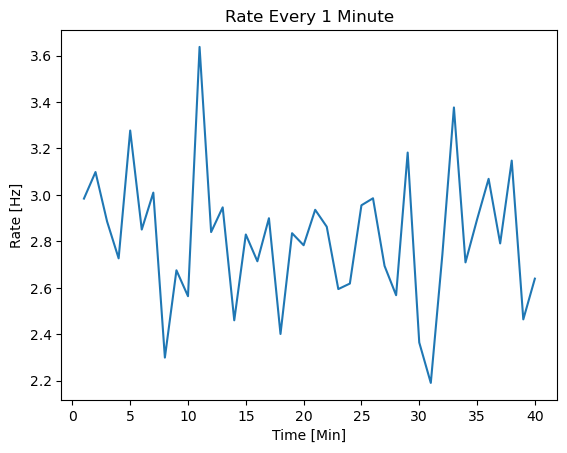

In [15]:
plt.plot(Data1Min.Minute,Data1Min.Rate)
plt.title("Rate Every 1 Minute")
plt.xlabel("Time [Min]")
plt.ylabel("Rate [Hz]");

In [16]:
#Data5Min = pd.DataFrame(columns=['Event','DownTime','Uptime','Minute'])
Data5Min = Data1Min.query('Minute % 5 == 0')

Data5Min = Data5Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data5Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate
0,1,406,727,-321,-1 days +23:59:59.679000,0,-3.115265
900,901,374232,74006,300226,0 days 00:05:00.226000,5,3.001073
1703,1704,746679,146677,600002,0 days 00:10:00.002000,10,2.839991
2586,2587,1120245,220213,900032,0 days 00:15:00.032000,15,2.874342
3404,3405,1493363,293335,1200028,0 days 00:20:00.028000,20,2.837434
4243,4244,1866754,366435,1500319,0 days 00:25:00.319000,25,2.828732
5070,5071,2239516,439498,1800018,0 days 00:30:00.018000,30,2.817194
5905,5906,2613197,512879,2100318,0 days 00:35:00.318000,35,2.811955
6752,6753,2986483,586104,2400379,0 days 00:40:00.379000,40,2.813306


In [17]:
Data5Min['DeltaCount'] = Data5Min.Event - Data5Min.Event.shift(1)
Data5Min['DeltaUpTime'] = Data5Min.UpTime - Data5Min.UpTime.shift(1)
Data5Min['Rate'] = Data5Min.DeltaCount / (Data5Min.DeltaUpTime /1000)


Data5Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate,DeltaCount,DeltaUpTime,Rate
0,1,406,727,-321,-1 days +23:59:59.679000,0,-3.115265,NaN,NaN,NaN
900,901,374232,74006,300226,0 days 00:05:00.226000,5,3.001073,900.0,300547.0,2.994540
1703,1704,746679,146677,600002,0 days 00:10:00.002000,10,2.839991,803.0,299776.0,2.678667
2586,2587,1120245,220213,900032,0 days 00:15:00.032000,15,2.874342,883.0,300030.0,2.943039
3404,3405,1493363,293335,1200028,0 days 00:20:00.028000,20,2.837434,818.0,299996.0,2.726703
4243,4244,1866754,366435,1500319,0 days 00:25:00.319000,25,2.828732,839.0,300291.0,2.793957
5070,5071,2239516,439498,1800018,0 days 00:30:00.018000,30,2.817194,827.0,299699.0,2.759435
5905,5906,2613197,512879,2100318,0 days 00:35:00.318000,35,2.811955,835.0,300300.0,2.780553
6752,6753,2986483,586104,2400379,0 days 00:40:00.379000,40,2.813306,847.0,300061.0,2.822759


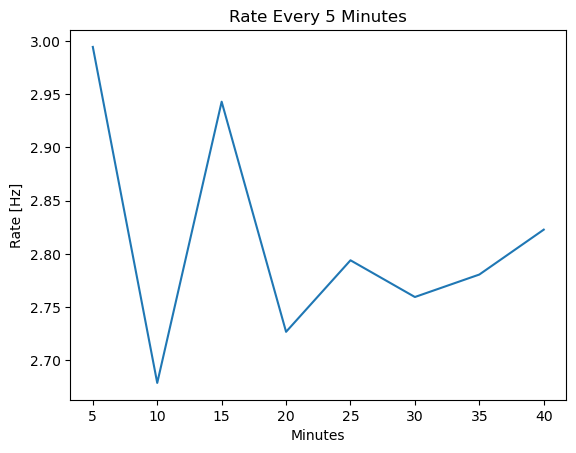

In [18]:
plt.plot(Data5Min.Minute,Data5Min.Rate)
plt.title("Rate Every 5 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");

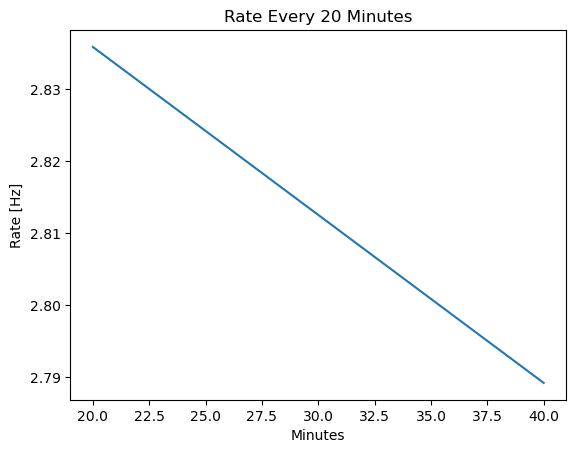

In [19]:
Data20Min = Data1Min.query('Minute % 20 == 0')

Data20Min = Data20Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data20Min['DeltaCount'] = Data20Min.Event - Data20Min.Event.shift(1)

Data20Min['DeltaUpTime'] = Data20Min.UpTime - Data20Min.UpTime.shift(1)

Data20Min['Rate'] = Data20Min.DeltaCount / (Data20Min.DeltaUpTime /1000)

plt.plot(Data20Min.Minute,Data20Min.Rate)
plt.title("Rate Every 20 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");